# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
state = pd.read_csv('../../data/common_datasets/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## Estimates of Location

### Mean & Median
- The median is referred to as a **robust estimate of location** since it is not influenced by outliers (extreme cases) that could skew the results 
- When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid.

In [4]:
print(f"Mean Population  : {state['Population'].mean():}")
print(f"Median Population: {state['Population'].median()}")


Mean Population  : 6162876.3
Median Population: 4436369.5


### Weighted Mean
- If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states. 
- Weighted mean is available with NumPy

In [5]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

## Exploring the Data Distribution


### Percentiles and Boxplots

In [6]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [7]:
state['Murder.Rate'].median() # 50 percentile is also a median

4.0

#### Boxplot
- **pandas** provides a number of basic exploratory plots for data frame

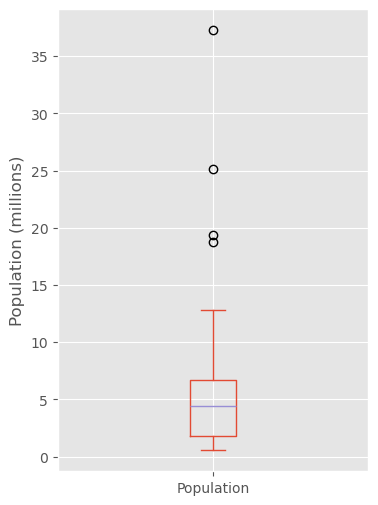

In [8]:
ax = (state['Population'] / 1_000_000).plot.box(figsize=(4,6))
ax.set_ylabel('Population (millions)')
plt.show()

- The top and bottom of the box are the 75th and 25th percentiles
- The median is shown by the horizontal line in the box.
- The dashed lines, referred to as **whiskers**, extend from the top and bottom of the box to indicate the range for the bulk of the data
- Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

### Frequency Tables and Histograms

In [9]:
binnedPopulation = pd.cut(state['Population'] / 1_000_000, 10)
binnedPopulation.name = 'binnedPopulation'

bin_count = binnedPopulation.value_counts().sort_index()

In [10]:
df = pd.concat([state['Abbreviation'], binnedPopulation], axis=1)
bin_state = df.groupby('binnedPopulation')['Abbreviation'].apply(list)
bin_state.name = 'States'

In [11]:
freq_table = pd.concat([bin_count, bin_state], axis=1)
freq_table

,count,States
binnedPopulation,,
"(0.527, 4.233]",24,"[AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, N..."
"(4.233, 7.902]",14,"[AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, T..."
"(7.902, 11.571]",6,"[GA, MI, NJ, NC, OH, VA]"
"(11.571, 15.24]",2,"[IL, PA]"
"(15.24, 18.909]",1,[FL]
"(18.909, 22.578]",1,[NY]
"(22.578, 26.247]",1,[TX]
"(26.247, 29.916]",0,[]
"(29.916, 33.585]",0,[]


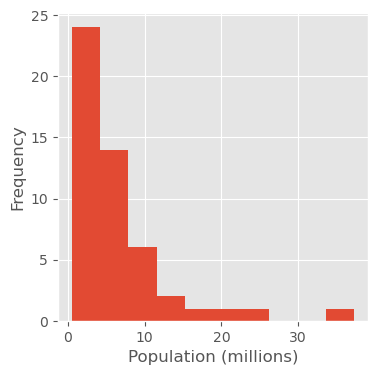

In [12]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
plt.show()

### Density Plots and Estimates
- A **density plot** can be thought of as a *smoothed* histogram, although it is typically computed directly from the data through a *kernel density estimate*

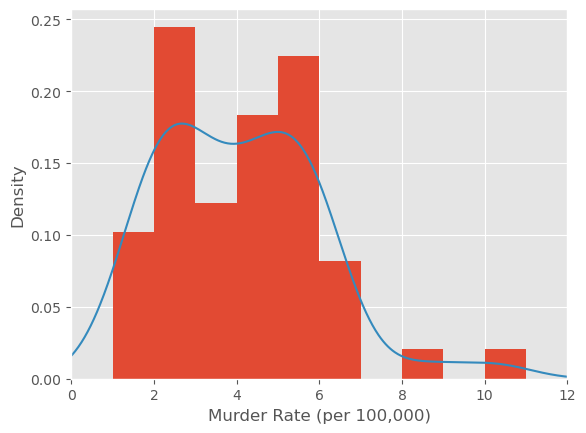

In [13]:
ax = state['Murder.Rate'].plot.hist(density=True,     # y-axis as density instead of count
                                    xlim=[0,12],   
                                    bins=range(1,12)) # set bin range from 1 to 12
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

## Exploring Binary and Categorical Data
- For categorical data, simple proportions or percentages tell the story of the data.

### Bar Chart (Histogram of Cat Data)
- A bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale.
- Getting a summary of a binary variable or a categorical variable with a few categories is a fairly easy matter: we just figure out the proportion of 1s, or the proportions of the important categories.

### Mode
- The mode is the value—or values in case of a tie—that appears most often in the data. 
- The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.
- For example: in most parts of the United States, the mode for religious preference would be Christian

### Expected Value
- The expected value is calculated as follows:
  - Multiply each outcome by its probability of occurrence.
  - Sum these values.
- Expected value is a fundamental concept in business valuation and capital budgeting
- For example: the marketer firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. 
  - The expected value of a webinar attendee is thus $22.50 per month, calculated as follows:
$$ EV = (0.05)*(300) + (0.15)*50 + (0.8)*0 = 22.5 $$


In [14]:
df_cat = pd.read_csv('../../data/common_datasets/cat_train.csv')

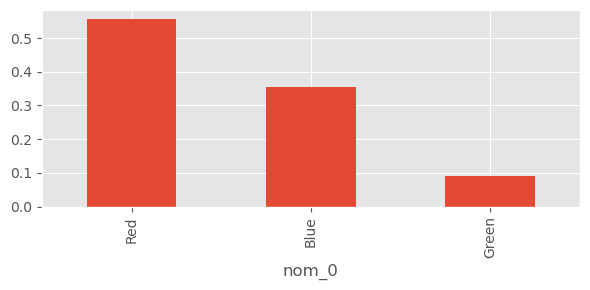

In [15]:
df_cat['nom_0'].value_counts(normalize=True).plot.bar(figsize=(6,3)) # normalise to get the proportion of each category
plt.tight_layout()

plt.show()

## Correlation

In [19]:
sp500_sym = pd.read_csv('../../data/common_datasets/sp500_sectors.csv')
sp500_px = pd.read_csv('../../data/common_datasets/sp500_data.csv.gz', index_col=0, parse_dates=True)

In [20]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


## Multi-variate Analysis

### Correlation Matrix

In [18]:
# Determine telecommunications symbols
telecom_symbols = sp500_sym.query("sector == 'telecommunications_services'")['symbol']

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [22]:
telecom = sp500_px.loc[sp500_px.index >='2012-07-01', telecom_symbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


- Correlation matrix, shows the correlation between the daily returns for telecommunication stocks from July 2012 through June 2015.
- In the above example, 
  - Verizon (VZ) and ATT (T) have the highest correlation. 
  - LVLT, which is an infrastructure company, has the lowest correlation with the others. 

### Heatmap

In [25]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


In [36]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return fig, ec, ax

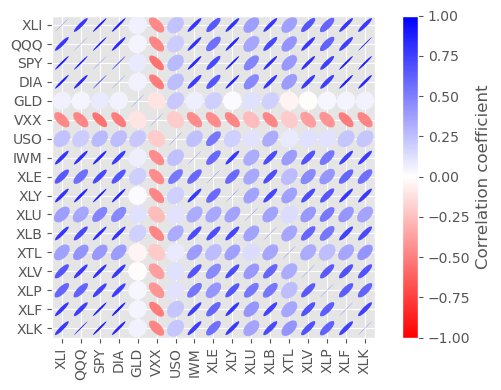

In [45]:
fig, m, ax = plot_corr_ellipses(etfs.corr(), figsize=(6, 4), cmap='bwr_r') #cmap='Greens', cmap='bwr_r'
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

-  Understanding the corr ellipse plot: 
  - The orientation of the ellipse indicates whether two variables are *positively correlated (ellipse is pointed to the top right*) or *negatively correlated (ellipse is pointed to the top left)*. - The **shading** and **width** of the ellipse indicate the strength of the association: **thinner** and **darker** ellipses correspond to **stronger** relationships.
- In the above example: 
  - *High Correlation*: The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. 
    - Similarly, the QQQ and the XLK, composed mostly of technology companies, are positively correlated
  - *Weekly or Negative Correlation*: Defensive ETFs, such as those tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with the other ETFs. 
  

### Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

In [47]:
#  In order to focus on the main part of the data, we strip out very expensive and very small or large residences 
kc_tax = pd.read_csv('../../data/common_datasets/kc_tax.csv.gz')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


- The `hexbin` method for pandas data frames is one powerful approach.

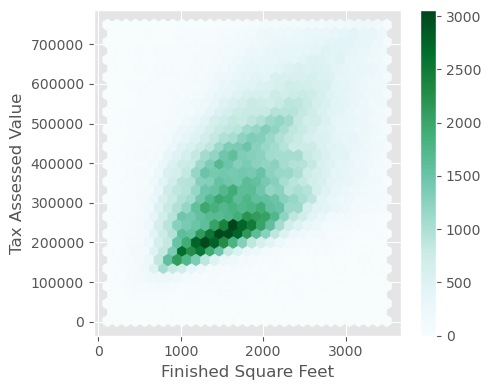

In [48]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

- Understanding the hexagonal binning plot:
  - The positive relationship between `square feet` and `tax-assessed` value is clear. 
  - The color bar on the right-hand side is the count
  - An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

### Contingency Table (2 Categorical Variables)

In [50]:
lc_loans = pd.read_csv('../../data/common_datasets/lc_loans.csv')

In [52]:
lc_loans.grade.value_counts()

grade
B    132370
C    120875
D     74277
A     72490
E     34804
F     12904
G      3241
Name: count, dtype: int64

In [59]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), 
                                margins=True # The margins keyword argument will add the column and row sums as "All"
                                )
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [58]:
df = crosstab.copy().loc['A':'G',:] # to filter "All" record
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) # divide col from 'Charged Off' to 'Late' with 'All' col, which is the total record per grade
df['All'] = df['All'] / sum(df['All'])

perc_crosstab = df
perc_crosstab


status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187
